
# Error propagation

## Uniform distribution

Let's consider a random variable $X$ that follows a uniform distribution in the interval $[a,b]$. The probability density function of $X$ is given by

$$
P(x) = \frac{1}{b-a} \quad \text{if} \quad a \leq x \leq b
$$

and $P(x) = 0$ otherwise. The mean value of $X$ is given by

$$
\langle X \rangle = \int_{-\infty}^{\infty} x P(x) dx = \int_{a}^{b} x \frac{1}{b-a} dx = \frac{a+b}{2}
$$

Consider two points in space, $x_1$ and $x_2$, that are separated by a distance $r = x_2 - x_1$. This distance is measured with an error $\delta r$ with uniform distribution.

Further, the angle between the line connecting the two points and the $x$ axis is $\theta$. This angle is measured with an error $\delta \theta$ with uniform distribution.

Question:  What are the x- and y-components of the distance $r$?

## Error propagation

Let's consider a function $f(x,y)$ of two variables $x$ and $y$. The error in $x$ is $\delta x$ and the error in $y$ is $\delta y$. The error in $f$ is given by

$$
\delta f = \left| \frac{\partial f}{\partial x} \right| \delta x + \left| \frac{\partial f}{\partial y}\right| \delta y
$$

The x-component of the distance $r$ is given by

$$
x = r \cos \theta
$$

The uncertainty in $x$ is given by

$$
\delta x = \left| \frac{\partial x}{\partial r} \right| \delta r + \left| \frac{\partial x}{\partial \theta}\right| \delta \theta
 = \left| \cos \theta \right| \delta r + \left| -r \sin \theta \right| \delta \theta
    = \cos \theta \delta r + r \sin \theta \delta \theta
$$

The y-component of the distance $r$ is given by

$$
y = r \sin \theta
$$

The uncertainty in $y$ is given by

$$
\delta y = \left| \frac{\partial y}{\partial r} \right| \delta r + \left| \frac{\partial y}{\partial \theta}\right| \delta \theta
    = \sin \theta \delta r + r \cos \theta \delta \theta
    
$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the variables
r = 1.0
theta = 45.0*np.pi/180.0

# Define the errors
dr = 0.05
dtheta = 2.0*np.pi/180.0

# Calculate the x and y components of r
x = r * np.cos(theta)
y = r * np.sin(theta)

# Calculate the uncertainties in x and y
dx = np.cos(theta) * dr + r * np.sin(theta) * dtheta
dy = np.sin(theta) * dr + r * np.cos(theta) * dtheta

# Print the results
print(f"x = {x:.2f} +/- {dx:.2f}")
print(f"y = {y:.2f} +/- {dy:.2f}")


x = 0.71 +/- 0.06
y = 0.71 +/- 0.06


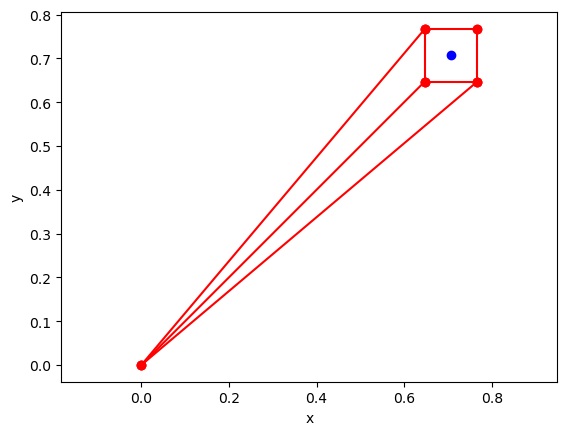

In [16]:
xmin = x - dx
xmax = x + dx
ymin = y - dy
ymax = y + dy

# Plot the points
plt.figure()
plt.plot([0, xmin], [0, ymin], 'ro-')
plt.plot([0, xmax], [0, ymin], 'ro-')
plt.plot([0, xmin], [0, ymax], 'ro-')
plt.plot([xmin, xmax], [ymin, ymin], 'ro-')
plt.plot([xmin, xmax], [ymax, ymax], 'ro-')
plt.plot([xmin, xmin], [ymin, ymax], 'ro-')
plt.plot([xmax, xmax], [ymin, ymax], 'ro-')
plt.plot(x, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

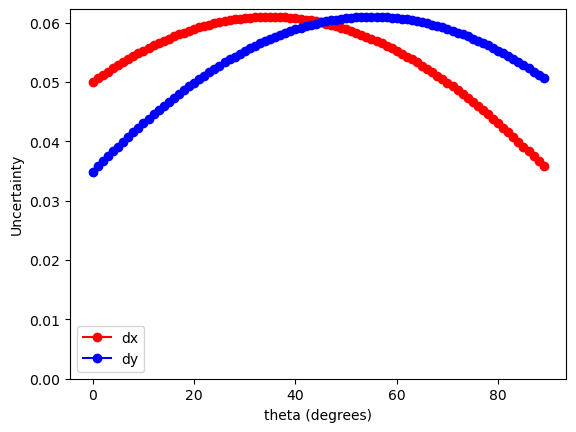

In [18]:
dx_values = []
dy_values = []
theta_values = []
for theta_degrees in range(0, 90):
    theta = theta_degrees*np.pi/180.0
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    dx = np.cos(theta) * dr + r * np.sin(theta) * dtheta
    dy = np.sin(theta) * dr + r * np.cos(theta) * dtheta
    dx_values.append(dx)
    dy_values.append(dy)
    theta_values.append(theta_degrees)
    
plt.figure()
plt.plot(theta_values, dx_values, 'ro-', label='dx')
plt.plot(theta_values, dy_values, 'bo-', label='dy')
plt.xlabel('theta (degrees)')
plt.ylabel('Uncertainty')
plt.ylim(0)
plt.legend()
plt.show()
    